In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import cluster
import re

os.chdir('/Users/ting/pythonjupyter/cms-jupyter-materials-english-1.0/Data')
os.getcwd()

'/Users/ting/pythonjupyter/cms-jupyter-materials-english-1.0/Data'

In [2]:
data = pd.read_csv('peakdata1.csv')
print(data.columns)
data

Index(['Run', 'Event', 'Type1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2',
       'Q2', 'M'],
      dtype='object')


,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.16230,0.476262,-8.516420,5.523060,8.52973,0.609133,-1.514930,...,G,19.77540,2.750800,-13.987100,13.705900,14.255000,0.853872,-1.376610,1,3.11319
1,165617,74428554,G,21.82790,-6.221380,11.084500,17.744700,12.71110,1.135660,2.082250,...,G,36.65130,-10.687400,15.069200,31.654400,18.474300,1.307610,2.187680,1,3.10098
2,165617,74981507,G,30.58620,15.521800,5.129310,-25.850900,16.34740,-1.239060,0.319160,...,G,12.48680,7.764020,1.042470,-9.723280,7.833690,-1.042090,0.133471,-1,3.07267
3,165617,75612982,G,7.55441,1.291290,-5.358840,-5.164620,5.51223,-0.836073,-1.334340,...,T,3.84161,-0.989578,-3.454830,-1.353400,3.593760,-0.368220,-1.849760,1,3.10045
4,165617,74760204,G,24.63760,9.983590,19.142600,-11.869700,21.58960,-0.525296,1.090070,...,G,11.02130,3.378510,7.827240,-6.984110,8.525250,-0.747611,1.163320,-1,3.18964
5,165617,75204668,G,10.70510,-8.466430,-2.237440,-6.156380,8.75709,-0.655136,-2.883230,...,G,55.18960,-45.042900,-16.615200,-27.220500,48.009600,-0.540305,-2.788200,-1,3.07007
6,165617,75682819,G,22.60670,5.026680,-0.315528,22.038300,5.03658,2.182010,-0.062688,...,G,17.87970,2.798720,2.056710,17.538800,3.473170,2.322160,0.633751,-1,2.92173
7,165617,75891163,G,11.67780,10.763600,2.255610,-3.926610,10.99740,-0.349867,0.206570,...,G,11.14580,9.006460,3.469810,-5.573210,9.651730,-0.549376,0.367733,-1,2.65228
8,165617,74949022,G,22.40590,1.375940,7.209580,-21.169400,7.33970,-1.781190,1.382220,...,T,4.78127,-0.566260,0.725542,-4.690670,0.920360,-2.331200,2.233510,1,2.60375
9,165617,74875638,G,23.07650,4.473350,7.904500,21.213800,9.08251,1.584410,1.055810,...,T,25.54210,1.989120,7.726530,24.263700,7.978470,1.831380,1.318830,1,3.07757


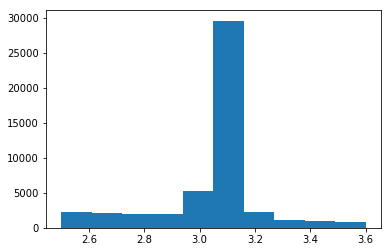

In [3]:
plt.hist(data.M)
plt.show()

In [4]:
l = []
for i in range(0, data.iloc[:, [20]].shape[0]):
    if re.search(r'3.1|.+', str(data.iloc[i, [20]][0])).group() == '3.1':
        l.append(data.iloc[i, :])

l = pd.DataFrame(l)

for i in range(0, l.iloc[:, [20]].shape[0]):
    l.iloc[i, [20]] = float(re.search(r'\d.\d\d|\d.\d', str(l.iloc[i, [20]][0])).group())
#l

In [5]:
l_x = l.iloc[:, [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19]]
l_y = l.iloc[:, [20]]

In [6]:
kmeans_fit = cluster.KMeans(n_clusters = 10).fit(l_x)
#print(kmeans_fit.labels_)
#print(l_y)

[5 4 2 ..., 0 2 0]
          M
0      3.11
1      3.10
3      3.10
4      3.18
18     3.16
20     3.15
23     3.11
34     3.10
39     3.10
42     3.11
43     3.13
48     3.10
50     3.10
57     3.12
59     3.11
60     3.11
61     3.11
65     3.16
66     3.10
71     3.14
72     3.10
77     3.11
79     3.13
81     3.13
87     3.11
89     3.10
91     3.13
94     3.10
95     3.11
98     3.14
...     ...
48124  3.18
48129  3.13
48139  3.12
48147  3.12
48149  3.13
48151  3.10
48152  3.11
48155  3.12
48156  3.10
48157  3.18
48160  3.15
48161  3.16
48163  3.12
48169  3.10
48171  3.11
48174  3.12
48180  3.12
48183  3.11
48185  3.16
48189  3.11
48190  3.11
48191  3.15
48195  3.10
48199  3.12
48206  3.11
48216  3.12
48217  3.13
48218  3.15
48220  3.10
48222  3.16

[14255 rows x 1 columns]


In [138]:
pd.DataFrame(kmeans_fit.labels_).to_csv('kmeans_fit_labels.csv')
pd.DataFrame(l_y).to_csv('l_y.csv')

In [39]:
res = pd.read_csv('res.csv')
res

,Unnamed: 0,M,0
0,0,3.11,5
1,1,3.10,7
2,3,3.10,4
3,4,3.18,3
4,18,3.16,6
5,20,3.15,9
6,23,3.11,5
7,34,3.10,5
8,39,3.10,4
9,42,3.11,4


In [33]:
coun = 0
for i in range(0, 10):
    for j in range(0, len(res['0'])):
        if res['0'][j] == i:
            coun = coun + 1
    print(i, coun)    


0 1480
1 2966
2 3549
3 5127
4 8820
5 10334
6 13065
7 13577
8 13858
9 14255


In [4]:
m_l = []
for i in range(0, 10):    
    m_l.append(3.10 + i/100)
m_l

[3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19]

In [10]:
for i in range(0, 10):
    coun_max = []
    for j in m_l:
        coun = 0
        for k in range(0, pd.DataFrame(res.loc[res.loc[:, '0'] == i, 'M'] == j).shape[0]):
            if pd.DataFrame(res.loc[res.loc[:, '0'] == i, 'M'] == j).loc[:, 'M'][pd.DataFrame(res.loc[res.loc[:, '0'] == i, 'M'] == j).index[k]]:
                coun = coun + 1
        coun_max.append([coun, i, j])
    #    print(coun, j)
    print(min(coun_max))


[16, 0, 3.19]
[18, 1, 3.19]
[17, 2, 3.19]
[23, 3, 3.19]
[44, 4, 3.18]
[15, 5, 3.18]
[59, 6, 3.19]
[14, 7, 3.19]
[7, 8, 3.18]
[8, 9, 3.19]


In [ ]:
for j in m_l:
    coun_min = []
    for i in range(0, 10):
        coun = 0
        for k in range(0, pd.DataFrame(res.loc[res.loc[:, 'M'] == j, '0'] == i).shape[0]):
            if pd.DataFrame(res.loc[res.loc[:, 'M'] == j, '0'] == i).loc[:, '0'][pd.DataFrame(res.loc[res.loc[:, 'M'] == j, '0'] == i).index[k]]:
                coun = coun + 1
        coun_min.append([coun, j, i])
    #    print(coun, j)
    print(min(coun_min))

[59, 3.1, 8]
[37, 3.11, 8]
[42, 3.12, 8]


In [19]:
data = pd.read_csv('Wenu_Run2011A.csv')
print(data.columns)
data

Index(['Run', 'Event', 'pt', 'eta', 'phi', 'Q', 'type', 'delEta', 'delPhi',
       'sigmaEtaEta', 'HoverE', 'isoTrack', 'isoEcal', 'isoHcal', 'MET',
       'phiMET'],
      dtype='object')


,Run,Event,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET
0,167676,328843401,38.63870,-0.849901,1.848570,-1,EB,0,0,0.009485,0.000000,0.000000,1.224090,0.000000,46.78840,-1.388570
1,167676,328836311,59.16660,-2.109460,-2.516300,1,EE,0,0,0.021378,0.017705,20.477100,2.544120,6.744960,15.01790,1.150270
2,167676,328915343,31.72620,2.450360,2.895600,1,EE,0,0,0.028839,0.000000,0.777484,1.822170,0.366293,20.65500,-0.270273
3,167676,328884653,73.41090,-1.395090,2.005210,-1,EB,0,0,0.010006,0.000000,22.858400,8.015060,8.295060,3.28583,-0.773930
4,167676,328970109,49.13630,-2.432580,3.021860,1,EE,0,0,0.027103,0.000000,0.000000,0.115398,0.000000,3.14248,2.508130
5,167676,328990625,53.95650,0.277265,2.818100,-1,EB,0,0,0.009599,0.023410,8.641380,4.163800,0.000000,19.43700,-0.189726
6,167676,329028347,37.74580,2.105880,1.599760,1,EE,0,0,0.020899,0.000000,0.000000,0.706338,0.000000,49.54910,-1.540870
7,167676,329021381,75.38380,-1.962420,0.503826,1,EE,0,0,0.015974,0.038155,11.960000,3.721860,6.378720,20.17200,-2.399940
8,167676,329087071,37.71990,-1.474830,-2.270410,-1,EB,0,0,0.005975,0.022207,0.000000,1.387910,0.715920,17.43090,1.016920
9,167676,329124215,32.56640,-0.416203,-0.148814,-1,EB,0,0,0.009161,0.000000,0.000000,1.272070,0.833530,59.39970,2.908250


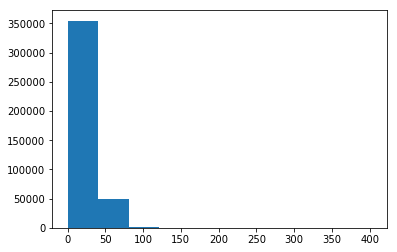

In [21]:
plt.hist(data.MET)
plt.show()

In [22]:
data = pd.read_csv('dielectron.csv')
print(data.columns)
data

Index(['Run', 'Event', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1',
       'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M'],
      dtype='object')


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.297400,12.820200,-2.202670,2.177660,1,11.283600,-1.032340,-1.880660,-11.077800,2.145370,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.112780,4.192420,-1.028420,-3.002840,-1,17.149200,-11.713500,5.044740,11.464700,12.753600,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.724600,11.661000,1.420480,2.965600,1,15.820300,-1.472800,2.258950,-15.588800,2.696670,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.866200,14.061900,2.218380,1.007210,1,25.127300,4.087860,2.596410,24.656300,4.842720,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.612100,14.917900,-2.093750,-1.371540,-1,13.887100,-0.277757,-2.425600,-13.670800,2.441450,-2.423700,-1.684810,-1,2.74718
5,147115,366663412,6.39616,-5.456720,-2.090680,-2.600780,5.843520,-0.431551,-2.775710,-1,21.386500,15.169800,-8.870300,-12.189300,17.572800,-0.647450,-0.529120,-1,18.40230
6,147115,366639101,84.50580,8.824360,10.578900,83.375300,13.776100,2.500320,0.875576,1,12.678400,-1.134460,-3.209390,-12.212800,3.404000,-1.989560,-1.910570,-1,65.32390
7,147115,367133576,77.00570,10.002900,9.175450,-75.800000,13.573700,-2.421030,0.742282,1,9.116230,-1.722950,-1.486740,-8.827610,2.275740,-2.064940,-2.429650,1,11.29120
8,147115,368639137,9.68787,1.111920,2.050640,-9.402840,2.332700,-2.102180,1.073940,1,63.459700,-1.858440,12.794600,-62.128700,12.928900,-2.273550,1.715040,1,3.58678
9,147115,367825395,27.88120,11.939000,-18.346200,17.269600,21.888800,0.724032,-0.993887,1,12.921800,-5.026300,11.602600,2.662630,12.644500,0.209050,1.979600,-1,34.26850


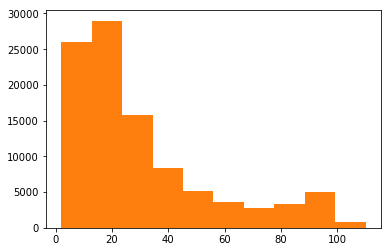

In [32]:
plt.hist(pd.DataFrame(data.dropna()).M)
plt.show()

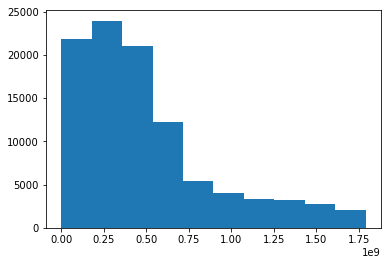

In [33]:
plt.hist(pd.DataFrame(data.dropna()).Event)
plt.show()

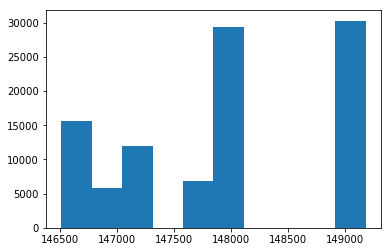

In [34]:
plt.hist(pd.DataFrame(data.dropna()).Run)
plt.show()